In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib.ticker import MaxNLocator

In [2]:
df = pd.read_csv('data/mgm-predictions.csv')
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
print(df)

         date  min1  min2  min3  min4  min5  max1  max2  max3  max4  max5
0  2025-11-21   4.0   NaN   NaN   NaN   NaN  18.0   NaN   NaN   NaN   NaN
1  2025-11-22   4.0   5.0   NaN   NaN   NaN  21.0  21.0   NaN   NaN   NaN
2  2025-11-23   8.0   7.0   7.0   NaN   NaN  21.0  21.0  21.0   NaN   NaN
3  2025-11-24   8.0   7.0   8.0   8.0   NaN  15.0  13.0  13.0  14.0   NaN
4  2025-11-25   NaN   4.0   3.0   4.0   6.0   NaN  16.0  14.0  13.0  12.0
5  2025-11-26   4.0   NaN   3.0   2.0   1.0  16.0   NaN  16.0  14.0  14.0
6  2025-11-27   5.0   4.0   NaN   3.0   2.0  17.0  16.0   NaN  17.0  16.0
7  2025-11-28   5.0   5.0   4.0   NaN   4.0  17.0  17.0  17.0   NaN  17.0
8  2025-11-29   4.0   4.0   5.0   4.0   NaN  15.0  15.0  16.0  14.0   NaN
9  2025-11-30   NaN   8.0   5.0   6.0   5.0   NaN  13.0  13.0  13.0  14.0
10 2025-12-01   NaN   NaN   5.0   3.0   3.0   NaN   NaN  11.0  11.0  10.0
11 2025-12-02   1.0   NaN   NaN   2.0   1.0  11.0   NaN   NaN  11.0  11.0
12 2025-12-03   1.0   1.0   NaN   NaN 

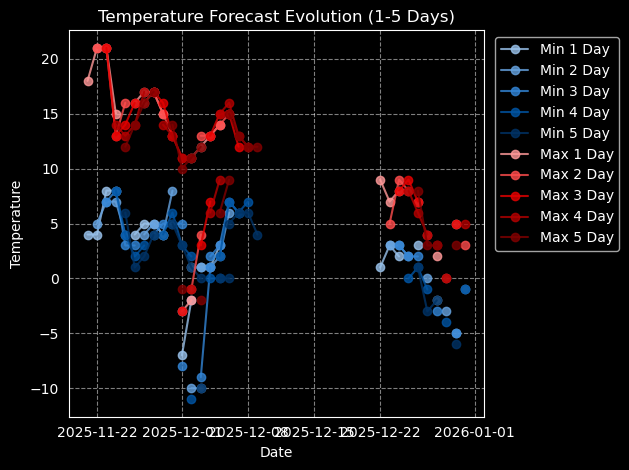

In [3]:
blue_shades = ['#99C2EB', '#66A3E0', '#3385D6', '#0055A4', '#003366']
red_shades  = ['#FF9999', '#FF4D4D', '#E60000', '#B30000', '#800000']
green_shades = ['#99E699', '#66CC66', '#33B233', '#009900', '#006600']

for i in range(1, 6):
    plt.plot(df['date'], df[f'min{i}'], marker='o', linestyle='-',
             color=blue_shades[i-1], label=f'Min {i} Day', alpha=0.8)

for i in range(1, 6):
    plt.plot(df['date'], df[f'max{i}'], marker='o', linestyle='-',
             color=red_shades[i-1], label=f'Max {i} Day', alpha=0.8)

plt.title('Temperature Forecast Evolution (1-5 Days)')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [4]:
days = [2, 3, 4, 5]
min_diffs = {}
max_diffs = {}

for d in days:
    min_diffs[d] = (df[f'min{d}'] - df['min1']).dropna()
    max_diffs[d] = (df[f'max{d}'] - df['max1']).dropna()

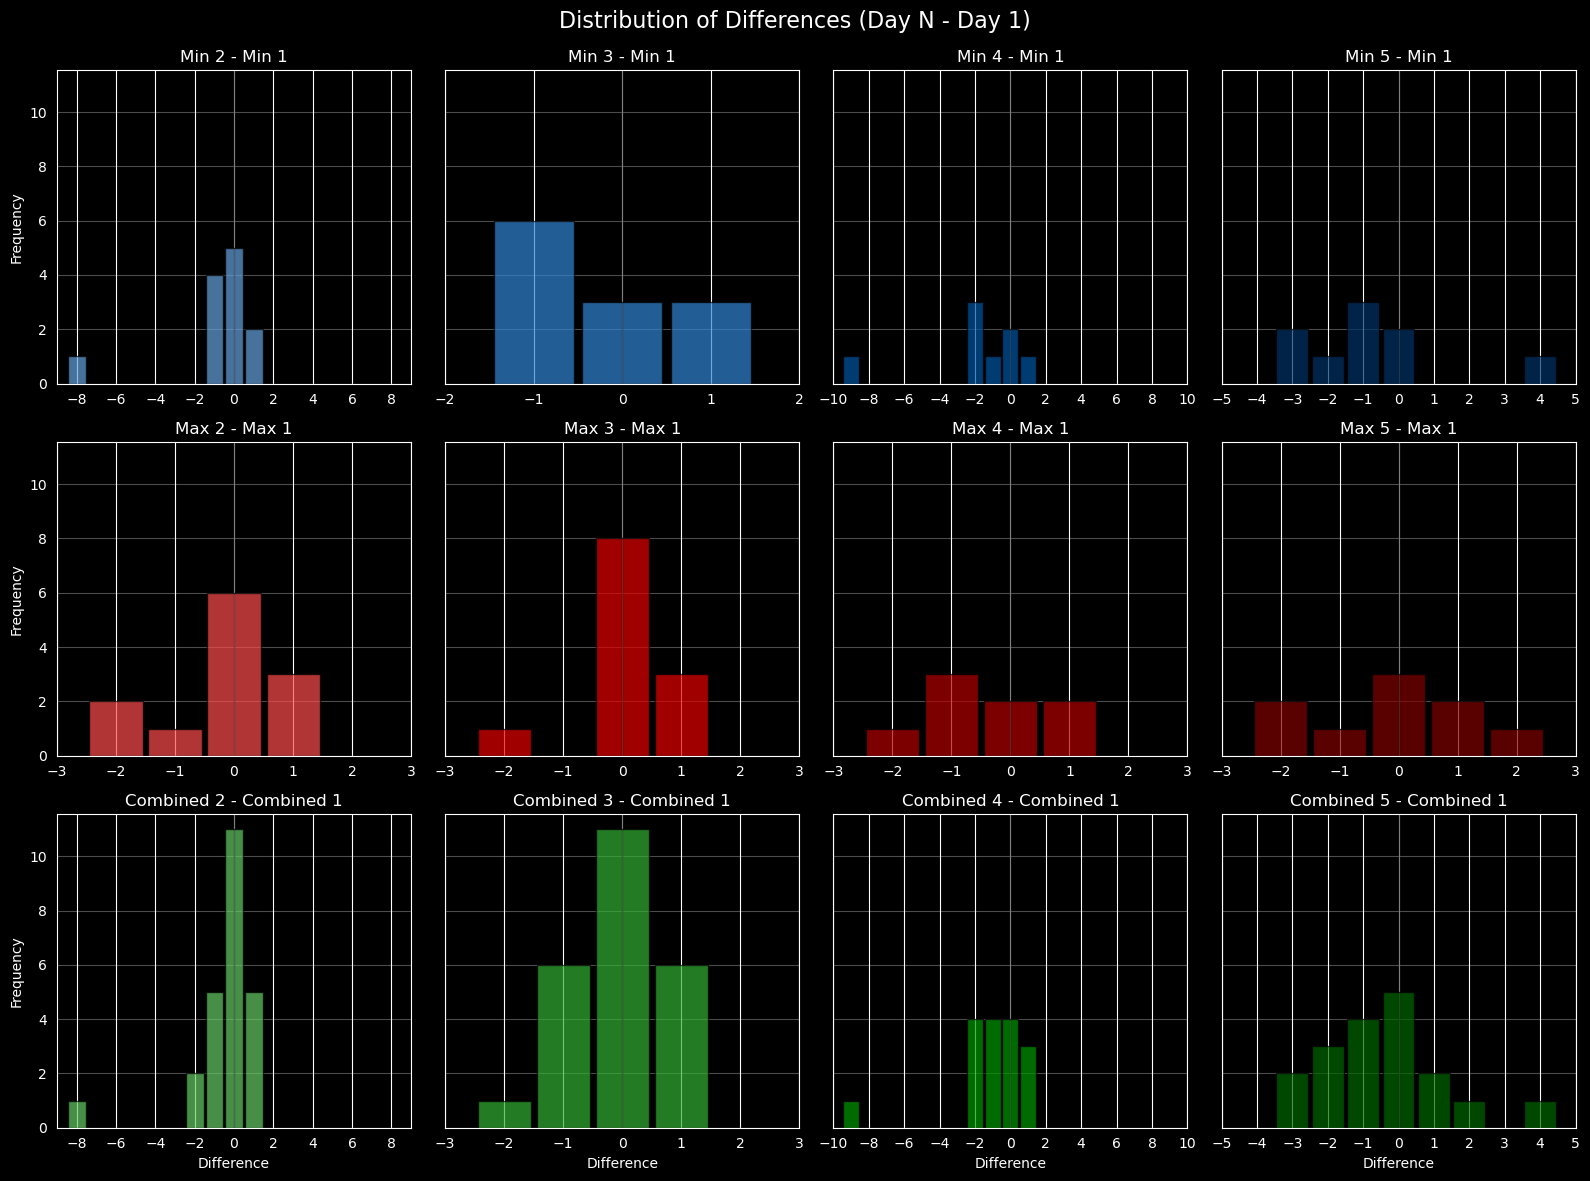

In [5]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12), sharey=True)
fig.suptitle('Distribution of Differences (Day N - Day 1)', fontsize=16)

def plot_integer_hist(ax, data, color, title, show_xlabel=False, show_ylabel=False):
    if len(data) > 0:
        max_val = max(abs(data.min()), abs(data.max()))
        limit = np.ceil(max_val) + 1
    else:
        limit = 2

    bins = np.arange(-limit - 0.5, limit + 1.5, 1)
    ax.hist(data, bins=bins, color=color, edgecolor='black', alpha=0.7, rwidth=0.9)
    ax.set_title(title)
    ax.grid(axis='y', alpha=0.3)
    ax.set_xlim(-limit, limit)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)

    if show_xlabel: ax.set_xlabel('Difference')
    if show_ylabel: ax.set_ylabel('Frequency')

for i, d in enumerate(days):
    plot_integer_hist(axes[0, i], min_diffs[d], blue_shades[d-1],
                      f'Min {d} - Min 1', show_ylabel=(i==0))

for i, d in enumerate(days):
    plot_integer_hist(axes[1, i], max_diffs[d], red_shades[d-1],
                      f'Max {d} - Max 1', show_ylabel=(i==0))

for i, d in enumerate(days):
    combined_data = np.concatenate([min_diffs[d], max_diffs[d]])

    plot_integer_hist(axes[2, i], combined_data, green_shades[d-1],
                      f'Combined {d} - Combined 1',
                      show_xlabel=True, show_ylabel=(i==0))

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

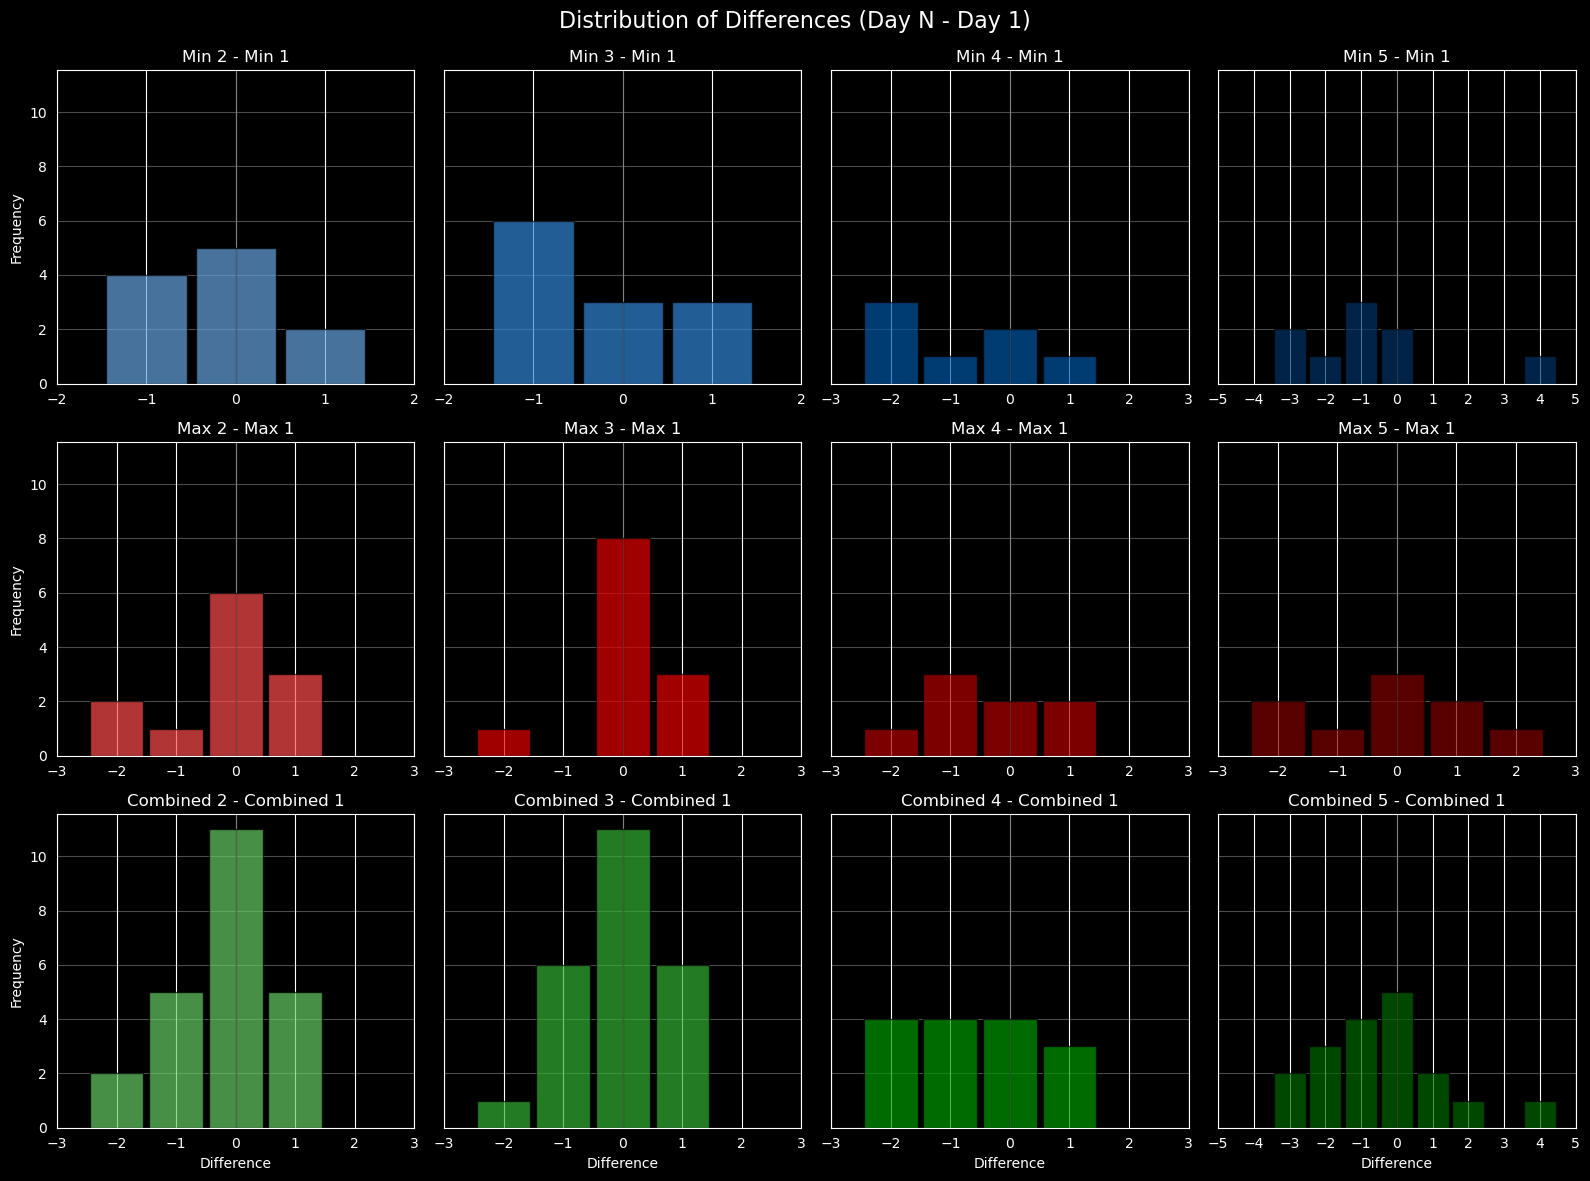

In [8]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12), sharey=True)
fig.suptitle('Distribution of Differences (Day N - Day 1)', fontsize=16)

for i, d in enumerate(days):
    data = min_diffs[d]
    filtered_data = data[(data >= -5) & (data <= 5)]
    plot_integer_hist(axes[0, i], filtered_data, blue_shades[d-1],
                      f'Min {d} - Min 1', show_ylabel=(i==0))

for i, d in enumerate(days):
    data = max_diffs[d]
    filtered_data = data[(data >= -5) & (data <= 5)]
    plot_integer_hist(axes[1, i], filtered_data, red_shades[d-1],
                      f'Max {d} - Max 1', show_ylabel=(i==0))

for i, d in enumerate(days):
    combined_data = np.concatenate([min_diffs[d], max_diffs[d]])
    filtered_data = combined_data[(combined_data >= -5) & (combined_data <= 5)]
    plot_integer_hist(axes[2, i], filtered_data, green_shades[d-1],
                      f'Combined {d} - Combined 1',
                      show_xlabel=True, show_ylabel=(i==0))

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

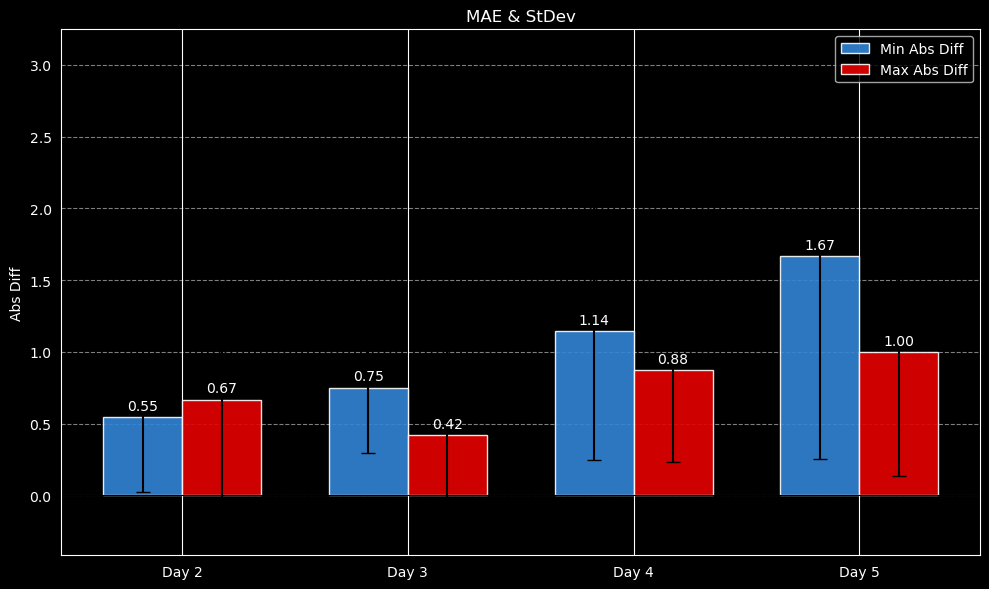

In [10]:
min_means = []
min_stds = []
max_means = []
max_stds = []

for d in days:
    raw_min = (df[f'min{d}'] - df['min1']).dropna()
    raw_min = raw_min[(raw_min >= -5) & (raw_min <= 5)]
    abs_min = raw_min.abs()

    raw_max = (df[f'max{d}'] - df['max1']).dropna()
    raw_max = raw_max[(raw_max >= -5) & (raw_max <= 5)]
    abs_max = raw_max.abs()

    min_means.append(abs_min.mean())
    min_stds.append(abs_min.std())
    max_means.append(abs_max.mean())
    max_stds.append(abs_max.std())

x = np.arange(len(days))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, min_means, width, label='Min Abs Diff',
                yerr=min_stds, capsize=5, color=blue_shades[2], alpha=0.9)
rects2 = ax.bar(x + width/2, max_means, width, label='Max Abs Diff',
                yerr=max_stds, capsize=5, color=red_shades[2], alpha=0.9)

ax.set_ylabel('Abs Diff')
ax.set_title('MAE & StDev')
ax.set_xticks(x)
ax.set_xticklabels([f'Day {d}' for d in days])
ax.axhline(0, color='black', linewidth=0.8)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()

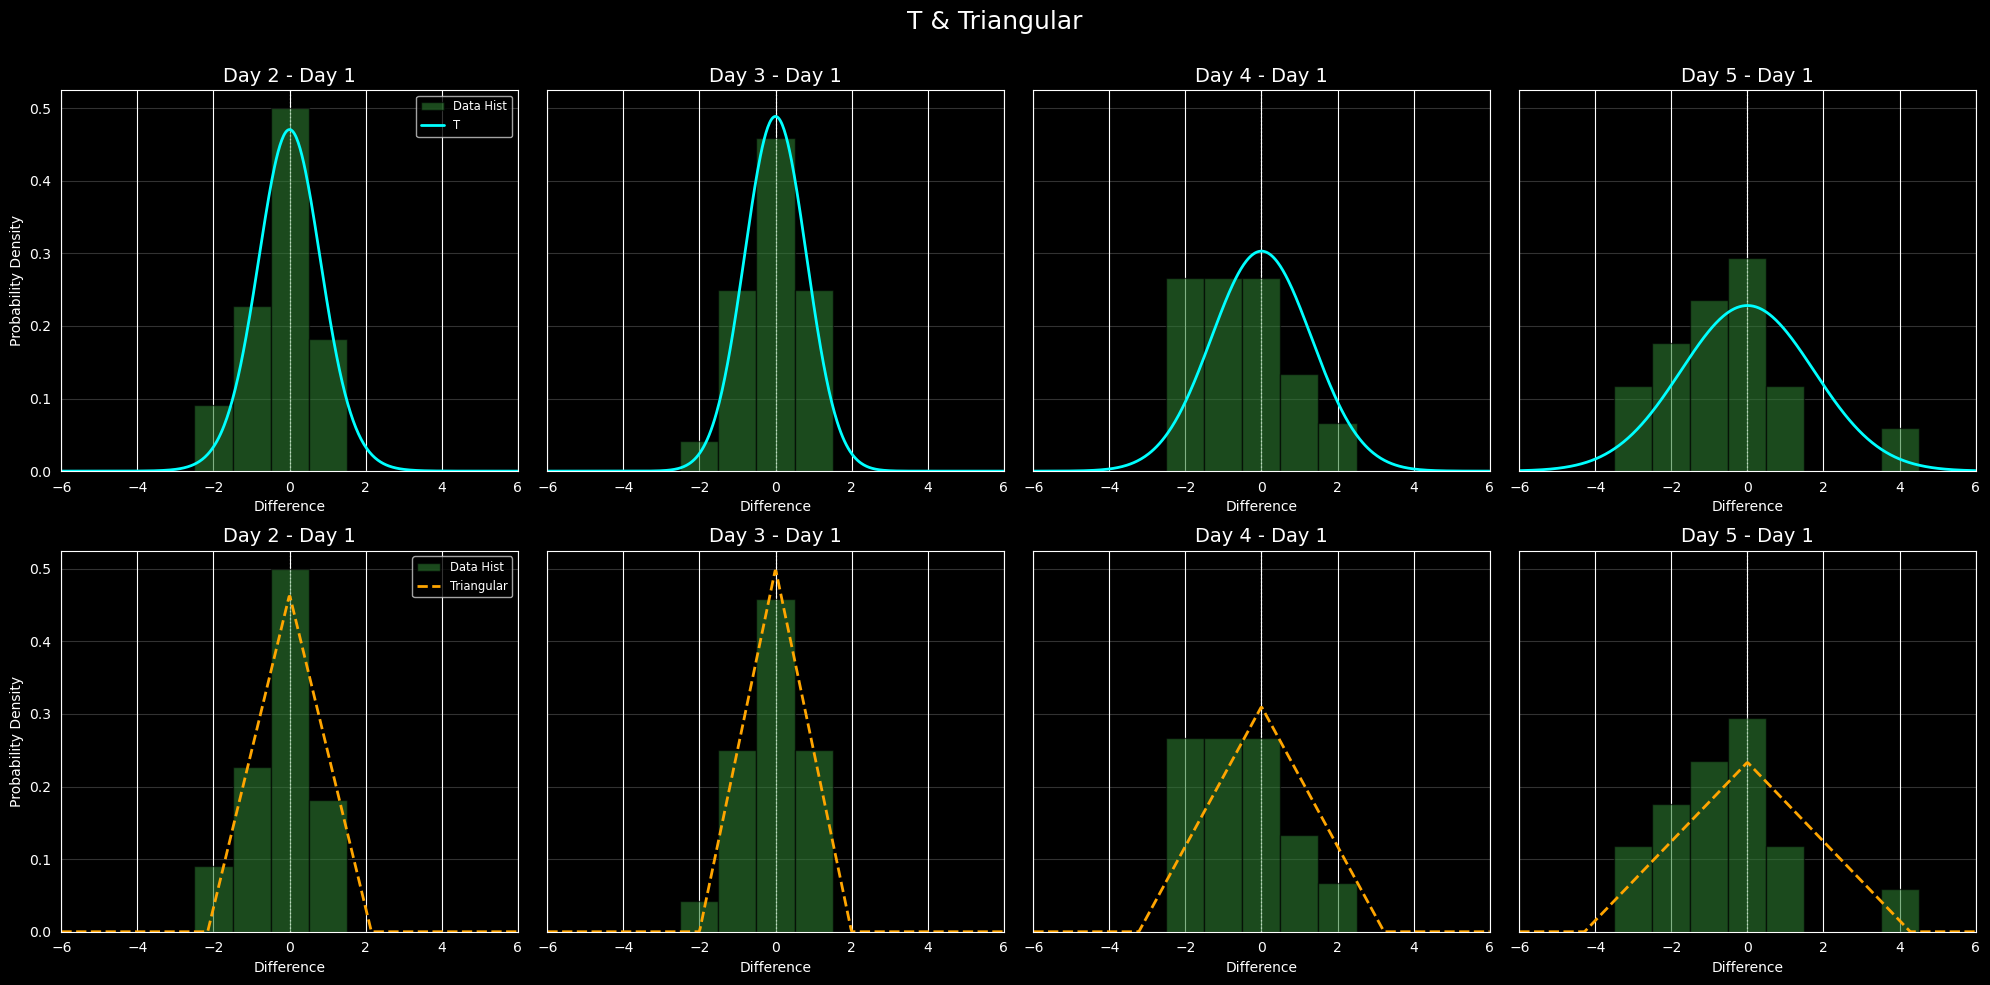

Day  Distribution   StDev          
2    T              0.8800
2    Triangular     0.8790

3    T              0.8165
3    Triangular     0.8165

4    T              1.3166
4    Triangular     1.3166

5    T              1.7489
5    Triangular     1.7489



In [45]:
from scipy.stats import t, triang

df_clean = df.dropna(subset=['min1'])
days = [2, 3, 4, 5]
combined_diffs = {}

for d in days:
    diff_min = df_clean[f'min{d}'] - df_clean['min1']
    diff_max = df_clean[f'max{d}'] - df_clean['max1']
    combined = pd.concat([diff_min, diff_max])
    combined = combined.dropna()
    combined = combined[(combined >= -5) & (combined <= 5)]
    combined_diffs[d] = combined

plt.style.use('dark_background')
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
fig.suptitle('T & Triangular', fontsize=18, color='white')

x_vals = np.linspace(-6, 6, 500)

for i, d in enumerate(days):
    ax_t = axes[0, i]
    ax_tri = axes[1, i]

    data_points = combined_diffs[d]

    if len(data_points) == 0:
        for ax in [ax_t, ax_tri]:
            ax.text(0, 0, "No Data", ha='center', color='white')
        continue

    for ax in [ax_t, ax_tri]:
        ax.hist(data_points, bins=np.arange(-5.5, 6.5, 1), density=True,
                color='#2e7d32', edgecolor='black', alpha=0.6, label='Data Hist')
        ax.set_title(f'Day {d} - Day 1', fontsize=14)
        ax.set_xlim(-6, 6)
        ax.grid(axis='y', alpha=0.2)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.axvline(0, color='white', linestyle=':', linewidth=1, alpha=0.5)
        ax.set_xlabel('Difference')

    df_t, loc_t, scale_t = t.fit(data_points, floc=0)
    pdf_t = t.pdf(x_vals, df_t, loc_t, scale_t)
    ax_t.plot(x_vals, pdf_t, 'cyan', lw=2, label=f'T')

    limit = np.sqrt(6 * np.mean(data_points**2))
    c, loc_tri, scale_tri = 0.5, -limit, 2 * limit
    pdf_tri = triang.pdf(x_vals, c, loc_tri, scale_tri)
    ax_tri.plot(x_vals, pdf_tri, 'orange', lw=2, linestyle='--', label='Triangular')

    if i == 0:
        ax_t.set_ylabel('Probability Density')
        ax_t.legend(loc='upper right', fontsize='small')

        ax_tri.set_ylabel('Probability Density')
        ax_tri.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

print(f"{'Day':<5}{'Distribution':<15}{'StDev':<15}")

for d in days:
    data_points = combined_diffs[d]
    if len(data_points) > 0:
        df_t, loc_t, scale_t = t.fit(data_points, floc=0)
        stdev_t = t.std(df_t, loc=loc_t, scale=scale_t)
        print(f"{d:<5}{'T':<15}{stdev_t:.4f}")

        limit = np.sqrt(6 * np.mean(data_points**2))
        c, loc_tri, scale_tri = 0.5, -limit, 2 * limit
        stdev_tri = triang.std(c, loc=loc_tri, scale=scale_tri)
        print(f"{d:<5}{'Triangular':<15}{stdev_tri:.4f}")
        print()

In [78]:
def t_prediction(prediction, limit, days):
    data = combined_diffs[days]
    df_day, loc, scale = t.fit(data, floc=0)
    diff_needed = prediction - limit

    prob = t.sf(diff_needed, df_day, loc, scale)

    print(f"Given prediction {prediction}, probability of the weather being less than {limit} is {prob:.4%} after {days} days.")
    return prob

def triangular_prediction(prediction, limit, days):
    data = combined_diffs[days]
    L = np.sqrt(6 * np.mean(data**2))

    c = 0.5
    loc = -L
    scale = 2 * L

    diff_needed = prediction - limit

    prob = triang.sf(diff_needed, c, loc, scale)

    print(f"Given prediction {prediction}, probability of the weather being less than {limit} is {prob:.4%} after {days} days.")
    return prob

In [79]:
t_prediction(-1, 0, 5)
triangular_prediction(-1, 0, 5);

Given prediction -1, probability of the weather being less than 0 is 71.6262% after 5 days.
Given prediction -1, probability of the weather being less than 0 is 70.6181% after 5 days.


In [82]:
def t_confidence(prediction, days, confidence):
    data = combined_diffs[days]

    df_day, loc, scale = t.fit(data, floc=0)

    min_err, max_err = t.interval(confidence, df_day, loc=loc, scale=scale)

    lower_bound = prediction + min_err
    upper_bound = prediction + max_err

    print(f"Based on prediction {prediction}, two tailed {confidence:.0%} confidence interval:")
    print(f"[{lower_bound:.4f}, {upper_bound:.4f}] after {days} days.")

    return lower_bound, upper_bound

def triangular_confidence(prediction, days, confidence):
    data = combined_diffs[days]

    limit = np.sqrt(6 * np.mean(data**2))
    c = 0.5
    loc = -limit
    scale = 2 * limit

    min_err, max_err = triang.interval(confidence, c, loc=loc, scale=scale)

    lower_bound = prediction + min_err
    upper_bound = prediction + max_err

    print(f"Based on prediction {prediction}, two tailed {confidence:.0%} confidence interval:")
    print(f"[{lower_bound:.4f}, {upper_bound:.4f}] after {days} days.")

    return lower_bound, upper_bound

In [83]:
t_confidence(-1, 5, 0.95)
triangular_confidence(-1, 5, 0.95);

Based on prediction -1, two tailed 95% confidence interval:
[-4.4279, 2.4279] after 5 days.
Based on prediction -1, two tailed 95% confidence interval:
[-4.3261, 2.3261] after 5 days.
